In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as BS
from tmdbv3api import TMDb, Movie, Person
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tmdb = TMDb()
tmdb.api_key = 'af93fa2599843ec2a57a2d067722525e'
tmdb.language = 'en'

Got my api key for The Movie Database and will now use it to get info on PTA

In [3]:
movie = Movie()
person = Person()

In [4]:
pta = person.search('Paul Thomas Anderson')[0]

In [5]:
pta_id = pta.id

In [6]:
credits = person.movie_credits(pta_id)

In [7]:
film_list = [credit for credit in credits['crew'] if credit['job'] == 'Director']

In [8]:
movie_data = []
for film in film_list:
    details = movie.details(film['id'])
    movie_credits = movie.credits(film["id"])
    cast_list = list(movie_credits.get('cast', []))
    top_actors =  [actor['name'] for actor in cast_list[:5]] if cast_list else []
    release_dates = details.release_dates.get('results', [])
    content_rating = release_dates[0]['release_dates'][0]['certification'] if release_dates else 'N/A'
    movie_info = {
        'title' : details.title,
        'rating' : details.vote_average,
        'content_rating': content_rating,
        'actors' : top_actors}
    movie_data.append(movie_info)
    

In [9]:
tmdb_df = pd.DataFrame(movie_data)

In [10]:
tmdb_df

,title,rating,content_rating,actors
0,Magnolia,7.723,MA 15+,"[Tom Cruise, Philip Baker Hall, Philip Seymour..."
1,Boogie Nights,7.626,R18+,"[Mark Wahlberg, Burt Reynolds, Julianne Moore,..."
2,Hard Eight,6.877,MA 15+,"[Philip Baker Hall, John C. Reilly, Gwyneth Pa..."
3,Punch-Drunk Love,7.123,,"[Adam Sandler, Emily Watson, Philip Seymour Ho..."
4,There Will Be Blood,8.072,,"[Daniel Day-Lewis, Paul Dano, Kevin J. O'Conno..."
5,Couch,4.644,,[Adam Sandler]
6,The Master,7.100,16,"[Joaquin Phoenix, Philip Seymour Hoffman, Amy ..."
7,Production Assistant,2.000,,[Paul Thomas Anderson]
8,Cigarettes & Coffee,6.707,NR,"[Kirk Baltz, Philip Baker Hall, Scott Coffey, ..."
9,The Dirk Diggler Story,5.200,,"[Michael Stein, Robert Ridgely, Eddie Delcore,..."


Need to split lists in the actors column to have the top 3 billed actors for each film in their each row

In [11]:
from imdb import Cinemagoer

In [12]:
ia = Cinemagoer()

In [13]:
directors = ia.search_person('Paul Thomas Anderson')

In [14]:
directors

[<Person id:0000759[http] name:_Paul Thomas Anderson_>,
 <Person id:2937683[http] name:_Bryan Anderson_>,
 <Person id:0027597[http] name:_Thomas Anderson-Barker_>,
 <Person id:15113431[http] name:_Todd Thomas Anderson_>,
 <Person id:3028608[http] name:_Thomas J. Anderson_>,
 <Person id:0027292[http] name:_Peter Anderson_>,
 <Person id:0027528[http] name:_Tom Anderson_>,
 <Person id:0027505[http] name:_Thomas Anderson_>,
 <Person id:13406852[http] name:_Thomas Anderson_>,
 <Person id:15925290[http] name:_Thomas Anderson_>,
 <Person id:0027506[http] name:_Thomas Anderson_>,
 <Person id:4323977[http] name:_Thomas Anderson_>,
 <Person id:6491581[http] name:_Thomas Anderson_>,
 <Person id:9205751[http] name:_Thomas Anderson_>,
 <Person id:11381853[http] name:_Thomas Anderson_>,
 <Person id:16252657[http] name:_Thomas Anderson_>,
 <Person id:1113064[http] name:_Thomas Anderson_>,
 <Person id:3312164[http] name:_Tom Anderson_>,
 <Person id:0026485[http] name:_Carl Anderson_>,
 <Person id:1240

In [15]:
pta = ia.get_person_filmography('0000759')

making sure I can find his whole filmography

https://cinemagoer.readthedocs.io/en/latest/usage/quickstart.html

In [16]:
pta

{'data': mappingproxy({}),
 'titlesRefs': {'Boogie Nights (1997)': <Movie id:0118749[http] title:_Boogie Nights (1997)_>,
  'The Dirk Diggler Story (1988)': <Movie id:0138403[http] title:_The Dirk Diggler Story (1988)_>,
  'This Is Spinal Tap (1984)': <Movie id:0088258[http] title:_This Is Spinal Tap (1984)_>,
  'Cigarettes & Coffee (1993)': <Movie id:0138363[http] title:_Cigarettes & Coffee (1993)_>,
  'Hard Eight (1996)': <Movie id:0119256[http] title:_Hard Eight (1996)_>,
  'Reservoir Dogs (1992)': <Movie id:0105236[http] title:_Reservoir Dogs (1992)_>,
  'Magnolia (1999)': <Movie id:0175880[http] title:_Magnolia (1999)_>,
  'Nashville (1975)': <Movie id:0073440[http] title:_Nashville (1975)_>,
  'Punch-Drunk Love (2002)': <Movie id:0272338[http] title:_Punch-Drunk Love (2002)_>,
  'Punch-Drunk Love': <Movie id:0272338[http] title:_Punch-Drunk Love (None)_>,
  'There Will Be Blood': <Movie id:0469494[http] title:_There Will Be Blood (None)_>,
  'Boogie Nights': <Movie id:0118749[htt

In [17]:
pta_films = [
    'The Dirk Diggler Story (1988)',
    'Boogie Nights (1997)',
    'Boogie Nights',
    'Magnolia (1999)',
    'Punch-Drunk Love (2002)',
    'Punch-Drunk Love',
    'There Will Be Blood',
    'Licorice Pizza',
    'Cigarettes & Coffee (1993)',
    'The Dirk Diggler Story (1988)'
]

In [18]:
extracted_films = [title for title in pta['titlesRefs'].keys() if title in pta_films]
extracted_films

['Boogie Nights (1997)',
 'The Dirk Diggler Story (1988)',
 'Cigarettes & Coffee (1993)',
 'Magnolia (1999)',
 'Punch-Drunk Love (2002)',
 'Punch-Drunk Love',
 'There Will Be Blood',
 'Boogie Nights',
 'Licorice Pizza']

I notice that there are some repeats and some missing titles, so I need to clean that up

In [19]:
hard_eight = ia.search_movie('hard eight')[0]

In [20]:
hardeight = hard_eight['title']

In [21]:
the_master = ia.search_movie('the master')[0]

In [22]:
master = the_master['title']

In [23]:
inh_vice = ia.search_movie('inherent vice')[0]

In [24]:
in_vice = inh_vice['title']

In [25]:
ph_thread = ia.search_movie('phantom thread')[0]

In [26]:
phantom = ph_thread['title']

In [27]:
extracted_films.append(master)

In [28]:
extracted_films.append(in_vice)

In [29]:
extracted_films.append(phantom)

In [30]:
extracted_films.append(hardeight)

In [31]:
extracted_films

['Boogie Nights (1997)',
 'The Dirk Diggler Story (1988)',
 'Cigarettes & Coffee (1993)',
 'Magnolia (1999)',
 'Punch-Drunk Love (2002)',
 'Punch-Drunk Love',
 'There Will Be Blood',
 'Boogie Nights',
 'Licorice Pizza',
 'The Master',
 'Inherent Vice',
 'Phantom Thread',
 'Hard Eight']

Made an empty list for the results of my defined function to get the relevant imdb information

In [32]:
results_list = []


def get_movie_rating(title):
    try:
        clean_title = title.split(' (')[0]
        search_results = ia.search_movie(clean_title)
        if not search_results:
            results_list.append({'title':title,'year':'Not Found','rating':'Not Found'})
            return
        movie = search_results[0]
        ia.update(movie)
        rating = movie.get('rating', 'Not Rated')
        year = movie.get('year', 'Year not found')
        actual_title = movie['title']
        results_list.append({'title':actual_title, 'year':year, 'rating':rating})

    except Exception as e:
        return f'Error processing {title}: {str(e)}'

In [33]:
for film in extracted_films:
    get_movie_rating(film)

In [34]:
imdb_df = pd.DataFrame(results_list)
imdb_df

,title,year,rating
0,Boogie Nights,1997,7.9
1,The Dirk Diggler Story,1988,5.9
2,Coffee and Cigarettes,2003,7.0
3,Magnolia,1999,8.0
4,Punch-Drunk Love,2002,7.3
5,Punch-Drunk Love,2002,7.3
6,There Will Be Blood,2007,8.2
7,Boogie Nights,1997,7.9
8,Licorice Pizza,2021,7.1
9,The Master,2012,7.1


In [35]:
md_df = pd.merge(tmdb_df, imdb_df, left_on='title', right_on='title', how='inner')

In [36]:
actor_df = pd.DataFrame(md_df['actors'].to_list(), columns=['actor1', 'actor2', 'actor3', 'actor4','actor5'])

In [37]:
md_df = md_df.drop(columns='actors').join(actor_df)

In [38]:
md_df = md_df.drop_duplicates()

In [39]:
md_df

,title,rating_x,content_rating,year,rating_y,actor1,actor2,actor3,actor4,actor5
0,Magnolia,7.723,MA 15+,1999,8.0,Tom Cruise,Philip Baker Hall,Philip Seymour Hoffman,Julianne Moore,William H. Macy
1,Boogie Nights,7.626,R18+,1997,7.9,Mark Wahlberg,Burt Reynolds,Julianne Moore,John C. Reilly,Heather Graham
3,Hard Eight,6.877,MA 15+,1996,7.1,Philip Baker Hall,John C. Reilly,Gwyneth Paltrow,Samuel L. Jackson,F. William Parker
4,Punch-Drunk Love,7.123,,2002,7.3,Adam Sandler,Emily Watson,Philip Seymour Hoffman,Luis Guzmán,Mary Lynn Rajskub
6,There Will Be Blood,8.072,,2007,8.2,Daniel Day-Lewis,Paul Dano,Kevin J. O'Connor,Ciarán Hinds,Dillon Freasier
7,The Master,7.100,16,2012,7.1,Joaquin Phoenix,Philip Seymour Hoffman,Amy Adams,Rami Malek,Laura Dern
8,The Dirk Diggler Story,5.200,,1988,5.9,Michael Stein,Robert Ridgely,Eddie Delcore,Rusty Schwimmer,Ernie Anderson
9,Inherent Vice,6.553,16,2014,6.6,Joaquin Phoenix,Josh Brolin,Owen Wilson,Katherine Waterston,Reese Witherspoon
10,Phantom Thread,7.315,,2017,7.4,Daniel Day-Lewis,Vicky Krieps,Lesley Manville,Camilla Rutherford,Gina McKee
11,Licorice Pizza,6.966,13,2021,7.1,Alana Haim,Cooper Hoffman,Sean Penn,Tom Waits,Bradley Cooper


Begin scraping RT for the RT scores

In [40]:
url = 'https://www.rottentomatoes.com/m/hard_eight'

response = requests.get(url)

In [41]:
response

<Response [200]>

In [42]:
rt_hard_eight = BS(response.text)

In [43]:
he_title = rt_hard_eight.findAll('title')[0].text

In [44]:
he_title

'Hard Eight | Rotten Tomatoes'

In [45]:
critic_elem = rt_hard_eight.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [46]:
he_cs = critic_score

In [47]:
audience_elem = rt_hard_eight.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [48]:
he_as = audience_score

In [49]:
hard_eight_full = []

hard_eight_full.append({
    'movie_title':he_title,
    'critic_rating':he_cs,
    'audience_rating':he_as})

In [50]:
hard_eight_full

[{'movie_title': 'Hard Eight | Rotten Tomatoes',
  'critic_rating': '82%',
  'audience_rating': '83%'}]

In [51]:
url2 = 'https://www.rottentomatoes.com/m/boogie_nights'

response_two = requests.get(url2)

In [52]:
bg_soup = BS(response_two.text)

In [53]:
bg_title = bg_soup.find('title').text

In [54]:
critic_elem = bg_soup.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [55]:
bg_cs = critic_score

In [56]:
audience_elem = bg_soup.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [57]:
bg_as = audience_score

In [58]:
boogie_nights = []

boogie_nights.append({
    'movie_title':bg_title,
    'critic_rating':bg_cs,
    'audience_rating':bg_as})

In [59]:
boogie_nights

[{'movie_title': 'Boogie Nights | Rotten Tomatoes',
  'critic_rating': '94%',
  'audience_rating': '89%'}]

In [60]:
url3 = 'https://www.rottentomatoes.com/m/magnolia'

response3 = requests.get(url3)

In [61]:
mag_bs = BS(response3.text)

In [62]:
mag_title = mag_bs.find('title').text

In [63]:
critic_elem = mag_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [64]:
mag_cs = critic_score

In [65]:
audience_elem = mag_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [66]:
mag_as = audience_score

In [67]:
magnolia = []

magnolia.append({
    'movie_title':mag_title,
    'critic_rating':mag_cs,
    'audience_rating':mag_as})

In [68]:
magnolia

[{'movie_title': 'Magnolia | Rotten Tomatoes',
  'critic_rating': '82%',
  'audience_rating': '89%'}]

In [69]:
url4 = 'https://www.rottentomatoes.com/m/punchdrunk_love'

response4 = requests.get(url4)

In [70]:
pdl_bs = BS(response4.text)

In [71]:
pdl_title = pdl_bs.find('title').text

In [72]:
critic_elem = pdl_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [73]:
pdl_cs = critic_score

In [74]:
audience_elem = pdl_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [75]:
pdl_as = audience_score

In [76]:
punchdrunk_love = []

punchdrunk_love.append({
    'movie_title':pdl_title,
    'critic_rating':pdl_cs,
    'audience_rating':pdl_as})

In [77]:
punchdrunk_love

[{'movie_title': 'Punch-Drunk Love | Rotten Tomatoes',
  'critic_rating': '79%',
  'audience_rating': '77%'}]

In [78]:
url5= 'https://www.rottentomatoes.com/m/there_will_be_blood'

response = requests.get(url5)

In [79]:
twbb_bs = BS(response.text)

In [80]:
twbb_title = twbb_bs.find('title').text

In [81]:
critic_elem = twbb_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [82]:
twbb_cs = critic_score

In [83]:
audience_elem = twbb_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [84]:
twbb_as = audience_score

In [85]:
therewill_beblood = []

therewill_beblood.append({
    'movie_title':twbb_title,
    'critic_rating':twbb_cs,
    'audience_rating':twbb_as})

In [86]:
therewill_beblood

[{'movie_title': 'There Will Be Blood | Rotten Tomatoes',
  'critic_rating': '91%',
  'audience_rating': '86%'}]

In [87]:
url6 = 'https://www.rottentomatoes.com/m/the_master_2011'

response = requests.get(url6)

In [88]:
tm_bs = BS(response.text)

In [89]:
tm_title = tm_bs.find('title').text

In [90]:
critic_elem = tm_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [91]:
tm_cs = critic_score

In [92]:
audience_elem = tm_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [93]:
tm_as = audience_score

In [94]:
the_master = []

the_master.append({
    'movie_title':tm_title,
    'critic_rating':tm_cs,
    'audience_rating':tm_as})

In [95]:
the_master

[{'movie_title': 'The Master | Rotten Tomatoes',
  'critic_rating': '85%',
  'audience_rating': '62%'}]

In [96]:
url7 = 'https://www.rottentomatoes.com/m/inherent_vice'

response = requests.get(url7)

In [97]:
ihv_bs = BS(response.text)

In [98]:
ihv_title = ihv_bs.find('title').text

In [99]:
critic_elem = ihv_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [100]:
ihv_cs = critic_score

In [101]:
audience_elem = ihv_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [102]:
ihv_as = audience_score

In [103]:
inherent_vice = []

inherent_vice.append({
    'movie_title':ihv_title,
    'critic_rating':ihv_cs,
    'audience_rating':ihv_as})

In [104]:
inherent_vice

[{'movie_title': 'Inherent Vice | Rotten Tomatoes',
  'critic_rating': '74%',
  'audience_rating': '53%'}]

In [105]:
url8 = 'https://www.rottentomatoes.com/m/phantom_thread'

response = requests.get(url8)

In [106]:
pt_bs = BS(response.text)

In [107]:
pt_title = pt_bs.find('title').text

In [108]:
critic_elem = pt_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [109]:
pt_cs = critic_score

In [110]:
audience_elem = pt_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [111]:
pt_as = audience_score

In [112]:
phantom_thread = []

phantom_thread.append({
    'movie_title':pt_title,
    'critic_rating':pt_cs,
    'audience_rating':pt_as})

In [113]:
phantom_thread

[{'movie_title': 'Phantom Thread | Rotten Tomatoes',
  'critic_rating': '91%',
  'audience_rating': '71%'}]

In [114]:
url9 = 'https://www.rottentomatoes.com/m/licorice_pizza'

response = requests.get(url9)

In [115]:
lp_bs = BS(response.text)

In [116]:
lp_title = lp_bs.find('title').text

In [117]:
critic_elem = lp_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [118]:
lp_cs = critic_score

In [119]:
audience_elem = lp_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [120]:
lp_as = audience_score

In [121]:
licorice_pizza = []

licorice_pizza.append({
    'movie_title':lp_title,
    'critic_rating':lp_cs,
    'audience_rating':lp_as})

In [122]:
licorice_pizza

[{'movie_title': 'Licorice Pizza | Rotten Tomatoes',
  'critic_rating': '90%',
  'audience_rating': '65%'}]

In [123]:
hard_eight = hard_eight_full[0]

In [124]:
boogie_nights = boogie_nights[0]

In [125]:
magnolia = magnolia[0]

In [126]:
punchdrunk_love = punchdrunk_love[0]

In [127]:
therewill_beblood = therewill_beblood[0]

In [128]:
the_master = the_master[0]

In [129]:
inherent_vice = inherent_vice[0]

In [130]:
phantom_thread = phantom_thread[0]

In [131]:
licorice_pizza = licorice_pizza[0]

In [132]:
rt_list = [hard_eight, boogie_nights, magnolia, punchdrunk_love, therewill_beblood, the_master, inherent_vice, phantom_thread, licorice_pizza]

In [133]:
rt_df = pd.DataFrame(rt_list)

In [134]:
rt_df['movie_title'] = rt_df['movie_title'].str.replace(' | Rotten Tomatoes','')

In [135]:
pta_df = pd.merge(md_df, rt_df, left_on='title', right_on='movie_title', how='inner')

In [136]:
pta_df = pta_df.drop(columns = 'movie_title')

In [137]:
pta_df = pta_df.rename(columns = {'title':'Film','rating_x':'TMDb_rating','content_rating':'MPAA_rating','year':'Release_Year','rating_y':'IMDb_rating',
               'critic_rating':'RT_critic_score','audience_rating':'RT_audience_score'})

In [138]:
pta_df['MPAA_rating'] = 'R'

In [139]:
pta_df

,Film,TMDb_rating,MPAA_rating,Release_Year,IMDb_rating,actor1,actor2,actor3,actor4,actor5,RT_critic_score,RT_audience_score
0,Magnolia,7.723,R,1999,8.0,Tom Cruise,Philip Baker Hall,Philip Seymour Hoffman,Julianne Moore,William H. Macy,82%,89%
1,Boogie Nights,7.626,R,1997,7.9,Mark Wahlberg,Burt Reynolds,Julianne Moore,John C. Reilly,Heather Graham,94%,89%
2,Hard Eight,6.877,R,1996,7.1,Philip Baker Hall,John C. Reilly,Gwyneth Paltrow,Samuel L. Jackson,F. William Parker,82%,83%
3,Punch-Drunk Love,7.123,R,2002,7.3,Adam Sandler,Emily Watson,Philip Seymour Hoffman,Luis Guzmán,Mary Lynn Rajskub,79%,77%
4,There Will Be Blood,8.072,R,2007,8.2,Daniel Day-Lewis,Paul Dano,Kevin J. O'Connor,Ciarán Hinds,Dillon Freasier,91%,86%
5,The Master,7.100,R,2012,7.1,Joaquin Phoenix,Philip Seymour Hoffman,Amy Adams,Rami Malek,Laura Dern,85%,62%
6,Inherent Vice,6.553,R,2014,6.6,Joaquin Phoenix,Josh Brolin,Owen Wilson,Katherine Waterston,Reese Witherspoon,74%,53%
7,Phantom Thread,7.315,R,2017,7.4,Daniel Day-Lewis,Vicky Krieps,Lesley Manville,Camilla Rutherford,Gina McKee,91%,71%
8,Licorice Pizza,6.966,R,2021,7.1,Alana Haim,Cooper Hoffman,Sean Penn,Tom Waits,Bradley Cooper,90%,65%


Finally got all of PTA's films into a dataframe. Going to start gathering Wes Anderson's data for comparison

In [140]:
wes = person.search('Wes Anderson')[0]

In [141]:
wes_id = wes.id

In [142]:
credits = person.movie_credits(wes_id)

In [143]:
film_list = [credit for credit in credits['crew'] if credit['job'] == 'Director']

In [144]:
movie_data = []
for film in film_list:
    details = movie.details(film['id'])
    movie_credits = movie.credits(film["id"])
    cast_list = list(movie_credits.get('cast', []))
    top_actors =  [actor['name'] for actor in cast_list[:5]] if cast_list else []
    release_dates = details.release_dates.get('results', [])
    content_rating = release_dates[0]['release_dates'][0]['certification'] if release_dates else 'N/A'
    movie_info = {
        'title' : details.title,
        'rating' : details.vote_average,
        'content_rating': content_rating,
        'actors' : top_actors}
    movie_data.append(movie_info)

In [145]:
tmdb2_df = pd.DataFrame(movie_data)

In [146]:
tmdb2_df

,title,rating,content_rating,actors
0,The Life Aquatic with Steve Zissou,7.081,12,"[Bill Murray, Owen Wilson, Cate Blanchett, Anj..."
1,Fantastic Mr. Fox,7.800,6,"[George Clooney, Meryl Streep, Jason Schwartzm..."
2,Hotel Chevalier,6.907,6,"[Jason Schwartzman, Natalie Portman, Waris Ahl..."
3,The Royal Tenenbaums,7.468,12,"[Gene Hackman, Anjelica Huston, Ben Stiller, G..."
4,Bottle Rocket,6.700,M,"[Luke Wilson, Owen Wilson, Robert Musgrave, Lu..."
5,Moonrise Kingdom,7.685,,"[Jared Gilman, Kara Hayward, Bruce Willis, Edw..."
6,Bottle Rocket,6.200,,"[Owen Wilson, Luke Wilson, Robert Musgrave, El..."
7,The Grand Budapest Hotel,8.042,12,"[Ralph Fiennes, F. Murray Abraham, Mathieu Ama..."
8,Cousin Ben Troop Screening,6.375,NR,"[Jason Schwartzman, Jake Ryan, Charlie Kilgore..."
9,The Rat Catcher,6.595,,"[Richard Ayoade, Ralph Fiennes, Rupert Friend,..."


Got Wes's info from TMDb

In [147]:
ia.search_person('Wes Anderson')[0]

<Person id:0027572[http] name:_Wes Anderson_>

In [148]:
wes_and = ia.get_person_filmography('0027572')

In [149]:
wes_and

{'data': mappingproxy({}),
 'titlesRefs': {'Rushmore (1998)': <Movie id:0128445[http] title:_Rushmore (1998)_>,
  'Bottle Rocket (1993)': <Movie id:0109322[http] title:_Bottle Rocket (1993)_>,
  'Bottle Rocket (1996)': <Movie id:0115734[http] title:_Bottle Rocket (1996)_>,
  'The Life Aquatic with Steve Zissou (2004)': <Movie id:0362270[http] title:_The Life Aquatic with Steve Zissou (2004)_>,
  'The Royal Tenenbaums (2001)': <Movie id:0265666[http] title:_The Royal Tenenbaums (2001)_>,
  'Fantastic Mr. Fox (2009)': <Movie id:0432283[http] title:_Fantastic Mr. Fox (2009)_>,
  'Bottle Rocket': <Movie id:0115734[http] title:_Bottle Rocket (None)_>,
  'Asteroid City': <Movie id:14230388[http] title:_Asteroid City (None)_>,
  'Fantastic Mr. Fox': <Movie id:0432283[http] title:_Fantastic Mr. Fox (None)_>,
  'The Royal Tenenbaums': <Movie id:0265666[http] title:_The Royal Tenenbaums (None)_>,
  'Moonrise Kingdom': <Movie id:1748122[http] title:_Moonrise Kingdom (None)_>,
  'The French Dispat

In [150]:
wesand_films = [
    'Bottle Rocket (1996)',
    'The Life Aquatic with Steve Zissou (2004)',
    'The Royal Tenenbaums (2001)',
    'Fantastic Mr. Fox (2009)',
    'Asteroid City',
    'The Royal Tenenbaums',
    'Moonrise Kingdom',
    'Rushmore']


[title for title in wes_and['titlesRefs'].keys() if title in wesand_films]

['Bottle Rocket (1996)',
 'The Life Aquatic with Steve Zissou (2004)',
 'The Royal Tenenbaums (2001)',
 'Fantastic Mr. Fox (2009)',
 'Asteroid City',
 'The Royal Tenenbaums',
 'Moonrise Kingdom']

Like before, there are some missing titles (4 to be exact) I need to add to this list.

In [151]:
tdl = ia.search_movie('The Darjeeling Limited')[0]

In [152]:
the_dl = tdl['title']

In [153]:
tgbh = ia.search_movie('The Grand Budapest Hotel')[0]

In [154]:
thegrand_bh = tgbh['title']

In [155]:
iod = ia.search_movie('Isle of Dogs')[0]

In [156]:
isle_of_dogs = iod['title']

In [157]:
tfd = ia.search_movie('The French Dispatch')[0]

In [158]:
the_frenchd = tfd['title']

In [159]:
wesand_films.append(the_dl)

In [160]:
wesand_films.append(thegrand_bh)

In [161]:
wesand_films.append(isle_of_dogs)

In [162]:
wesand_films.append(the_frenchd)

In [163]:
wesand_films

['Bottle Rocket (1996)',
 'The Life Aquatic with Steve Zissou (2004)',
 'The Royal Tenenbaums (2001)',
 'Fantastic Mr. Fox (2009)',
 'Asteroid City',
 'The Royal Tenenbaums',
 'Moonrise Kingdom',
 'Rushmore',
 'The Darjeeling Limited',
 'The Grand Budapest Hotel',
 'Isle of Dogs',
 'The French Dispatch']

In [164]:
for film in wesand_films:
    get_movie_rating(film)

In [165]:
imdb2_df = pd.DataFrame(results_list)

In [166]:
wes_imdb = imdb2_df.drop(range(0,13))

In [167]:
wes_imdb = wes_imdb.reset_index()

In [168]:
wes_imdb = wes_imdb.drop(columns=('index'))

In [169]:
wes_imdb

,title,year,rating
0,Bottle Rocket,1996,6.9
1,The Life Aquatic with Steve Zissou,2004,7.2
2,The Royal Tenenbaums,2001,7.6
3,Fantastic Mr. Fox,2009,7.9
4,Asteroid City,2023,6.4
5,The Royal Tenenbaums,2001,7.6
6,Moonrise Kingdom,2012,7.8
7,Rushmore,1998,7.6
8,The Darjeeling Limited,2007,7.2
9,The Grand Budapest Hotel,2014,8.1


Have all of his IMDb info now onto RT

In [170]:
url = 'https://www.rottentomatoes.com/m/bottle_rocket'

response = requests.get(url)

In [171]:
br_bs = BS(response.text)

In [172]:
br_title = br_bs.find('title').text

In [173]:
critic_elem = br_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [174]:
br_cs = critic_score

In [175]:
audience_elem = br_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [176]:
br_as = audience_score

In [177]:
br_dict = []

br_dict.append({
    'movie_title':br_title,
    'critic_rating':br_cs,
    'audience_rating':br_as})

In [178]:
bottle_rocket = br_dict[0]

In [179]:
url = 'https://www.rottentomatoes.com/m/rushmore'

response = requests.get(url)

In [180]:
rm_bs = BS(response.text)

In [181]:
rm_title = rm_bs.find('title').text

In [182]:
critic_elem = rm_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [183]:
rm_cs = critic_score

In [184]:
audience_elem = rm_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [185]:
rm_as = audience_score

In [186]:
rm_dict = []

rm_dict.append({
    'movie_title':rm_title,
    'critic_rating':rm_cs,
    'audience_rating':rm_as})

In [187]:
rushmore = rm_dict[0]

In [188]:
rushmore

{'movie_title': 'Rushmore | Rotten Tomatoes',
 'critic_rating': '90%',
 'audience_rating': '91%'}

In [189]:
url = 'https://www.rottentomatoes.com/m/the_royal_tenenbaums'

response = requests.get(url)

In [190]:
trt_bs = BS(response.text)

In [191]:
trt_title = trt_bs.find('title').text

In [192]:
critic_elem = trt_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [193]:
trt_cs = critic_score

In [194]:
audience_elem = trt_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [195]:
trt_as = audience_score

In [196]:
trt_dict = []

trt_dict.append({
    'movie_title':trt_title,
    'critic_rating':trt_cs,
    'audience_rating':trt_as})

In [197]:
royal_tens = trt_dict[0]

In [198]:
url = 'https://www.rottentomatoes.com/m/life_aquatic'

response = requests.get(url)

In [199]:
la_bs = BS(response.text)

In [200]:
la_title = la_bs.find('title').text

In [201]:
critic_elem = la_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [202]:
la_cs = critic_score

In [203]:
audience_elem = la_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [204]:
la_as = audience_score

In [205]:
la_dict = []

la_dict.append({
    'movie_title':la_title,
    'critic_rating':la_cs,
    'audience_rating':la_as})

In [206]:
life_aquatic = la_dict[0]

In [207]:
url = 'https://www.rottentomatoes.com/m/darjeeling_limited'

response = requests.get(url)

In [208]:
dl_bs = BS(response.text)

In [209]:
dl_title = dl_bs.find('title').text

In [210]:
critic_elem = dl_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [211]:
dl_cs = critic_score

In [212]:
audience_elem = dl_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [213]:
dl_as = audience_score

In [214]:
dl_dict = []

dl_dict.append({
    'movie_title':dl_title,
    'critic_rating':dl_cs,
    'audience_rating':dl_as})

In [215]:
darjeeling_lmtd = dl_dict[0]

In [216]:
url = 'https://www.rottentomatoes.com/m/1197696-fantastic_mr_fox'

response = requests.get(url)

In [217]:
fmf_bs = BS(response.text)

In [218]:
fmf_title = fmf_bs.find('title').text

In [219]:
critic_elem = fmf_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [220]:
fmf_cs = critic_score

In [221]:
audience_elem = fmf_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [222]:
fmf_as = audience_score

In [223]:
fmf_dict = []

fmf_dict.append({
    'movie_title':fmf_title,
    'critic_rating':fmf_cs,
    'audience_rating':fmf_as})

In [224]:
fan_mrfox = fmf_dict[0]

In [225]:
url = 'https://www.rottentomatoes.com/m/moonrise_kingdom'

response = requests.get(url)

In [226]:
mk_bs = BS(response.text)

In [227]:
mk_title = mk_bs.find('title').text

In [228]:
critic_elem = mk_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [229]:
mk_cs = critic_score

In [230]:
audience_elem = mk_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [231]:
mk_as = audience_score

In [232]:
mk_dict = []

mk_dict.append({
    'movie_title':mk_title,
    'critic_rating':mk_cs,
    'audience_rating':mk_as})

In [233]:
moonrise_king = mk_dict[0]

In [234]:
url = 'https://www.rottentomatoes.com/m/the_grand_budapest_hotel'

response = requests.get(url)

In [235]:
tgbh_bs = BS(response.text)

In [236]:
tgbh_title = tgbh_bs.find('title').text

In [237]:
critic_elem = tgbh_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [238]:
tgbh_cs = critic_score

In [239]:
audience_elem = mk_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [240]:
tgbh_as = audience_score

In [241]:
tgbh_dict = []

tgbh_dict.append({
    'movie_title':tgbh_title,
    'critic_rating':tgbh_cs,
    'audience_rating':tgbh_as})

In [242]:
the_grand_bhotel = tgbh_dict[0]

In [243]:
url = 'https://www.rottentomatoes.com/m/isle_of_dogs_2018'

response = requests.get(url)

In [244]:
iod_bs = BS(response.text)

In [245]:
iod_title = iod_bs.find('title').text

In [246]:
critic_elem = iod_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [247]:
iod_cs = critic_score

In [248]:
audience_elem = iod_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [249]:
iod_as = audience_score

In [250]:
iod_dict = []

iod_dict.append({
    'movie_title':iod_title,
    'critic_rating':iod_cs,
    'audience_rating':iod_as})

In [251]:
isle_of_dogs = iod_dict[0]

In [252]:
url = 'https://www.rottentomatoes.com/m/the_french_dispatch'

response = requests.get(url)

In [253]:
tfd_bs = BS(response.text)

In [254]:
tfd_title = tfd_bs.find('title').text

In [255]:
critic_elem = tfd_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [256]:
tfd_cs = critic_score

In [257]:
audience_elem = tfd_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [258]:
tfd_as = audience_score

In [259]:
tfd_dict = []

tfd_dict.append({
    'movie_title':tfd_title,
    'critic_rating':tfd_cs,
    'audience_rating':tfd_as})

In [260]:
the_french_dis = tfd_dict[0]

In [261]:
url = 'https://www.rottentomatoes.com/m/asteroid_city'

response = requests.get(url)

In [262]:
ac_bs = BS(response.text)

In [263]:
ac_title = ac_bs.find('title').text

In [264]:
critic_elem = ac_bs.find("rt-text", {"slot": "criticsScore"})
if critic_elem:
    critic_score = critic_elem.text.strip()

In [265]:
ac_cs = critic_score

In [266]:
audience_elem = ac_bs.find("rt-text", {"slot": "audienceScore"})
if audience_elem:
    audience_score = audience_elem.text.strip()

In [267]:
ac_as = audience_score

In [268]:
ac_dict = []

ac_dict.append({
    'movie_title':ac_title,
    'critic_rating':ac_cs,
    'audience_rating':ac_as})

In [269]:
asteroid_city = ac_dict[0]

In [270]:
wart_list = [bottle_rocket, rushmore, royal_tens, life_aquatic, darjeeling_lmtd, fan_mrfox, moonrise_king, the_grand_bhotel, isle_of_dogs,
             the_french_dis, asteroid_city]

In [271]:
rtwa_df = pd.DataFrame(wart_list)

In [272]:
rtwa_df['movie_title'] = rtwa_df['movie_title'].str.replace(' | Rotten Tomatoes','')

In [273]:
rtwa_df

,movie_title,critic_rating,audience_rating
0,Bottle Rocket,86%,79%
1,Rushmore,90%,91%
2,The Royal Tenenbaums,81%,89%
3,The Life Aquatic With Steve Zissou,57%,82%
4,The Darjeeling Limited,69%,78%
5,Fantastic Mr. Fox,93%,85%
6,Moonrise Kingdom,93%,86%
7,The Grand Budapest Hotel,92%,86%
8,Isle of Dogs (2018),90%,87%
9,The French Dispatch,75%,76%


In [274]:
actors_df = pd.DataFrame(tmdb2_df['actors'].to_list(), columns=['actor1', 'actor2', 'actor3', 'actor4','actor5'])

In [275]:
tmdb2_df = tmdb2_df.drop(columns='actors').join(actors_df)

In [276]:
tmdb2_df

,title,rating,content_rating,actor1,actor2,actor3,actor4,actor5
0,The Life Aquatic with Steve Zissou,7.081,12,Bill Murray,Owen Wilson,Cate Blanchett,Anjelica Huston,Willem Dafoe
1,Fantastic Mr. Fox,7.800,6,George Clooney,Meryl Streep,Jason Schwartzman,Wallace Wolodarsky,Eric Chase Anderson
2,Hotel Chevalier,6.907,6,Jason Schwartzman,Natalie Portman,Waris Ahluwalia,Michel Castejon,None
3,The Royal Tenenbaums,7.468,12,Gene Hackman,Anjelica Huston,Ben Stiller,Gwyneth Paltrow,Luke Wilson
4,Bottle Rocket,6.700,M,Luke Wilson,Owen Wilson,Robert Musgrave,Lumi Cavazos,James Caan
5,Moonrise Kingdom,7.685,,Jared Gilman,Kara Hayward,Bruce Willis,Edward Norton,Bill Murray
6,Bottle Rocket,6.200,,Owen Wilson,Luke Wilson,Robert Musgrave,Elissa Sommerfield,Isiah Ellis
7,The Grand Budapest Hotel,8.042,12,Ralph Fiennes,F. Murray Abraham,Mathieu Amalric,Adrien Brody,Willem Dafoe
8,Cousin Ben Troop Screening,6.375,NR,Jason Schwartzman,Jake Ryan,Charlie Kilgore,Gabriel Rush,L.J. Foley
9,The Rat Catcher,6.595,,Richard Ayoade,Ralph Fiennes,Rupert Friend,Eliel Ford,Benoît Herlin


In [277]:
wes_imdb

,title,year,rating
0,Bottle Rocket,1996,6.9
1,The Life Aquatic with Steve Zissou,2004,7.2
2,The Royal Tenenbaums,2001,7.6
3,Fantastic Mr. Fox,2009,7.9
4,Asteroid City,2023,6.4
5,The Royal Tenenbaums,2001,7.6
6,Moonrise Kingdom,2012,7.8
7,Rushmore,1998,7.6
8,The Darjeeling Limited,2007,7.2
9,The Grand Budapest Hotel,2014,8.1


In [278]:
timdb = pd.merge(tmdb2_df, wes_imdb, left_on='title', right_on='title', how='inner')

In [279]:
timdb['title'] = timdb['title'].str.strip()

In [280]:
timdb['title'] = timdb['title'].str.replace('The Life Aquatic with Steve Zissou', 'The Life Aquatic With Steve Zissou')

In [281]:
timdb

,title,rating_x,content_rating,actor1,actor2,actor3,actor4,actor5,year,rating_y
0,The Life Aquatic With Steve Zissou,7.081,12,Bill Murray,Owen Wilson,Cate Blanchett,Anjelica Huston,Willem Dafoe,2004,7.2
1,Fantastic Mr. Fox,7.800,6,George Clooney,Meryl Streep,Jason Schwartzman,Wallace Wolodarsky,Eric Chase Anderson,2009,7.9
2,The Royal Tenenbaums,7.468,12,Gene Hackman,Anjelica Huston,Ben Stiller,Gwyneth Paltrow,Luke Wilson,2001,7.6
3,The Royal Tenenbaums,7.468,12,Gene Hackman,Anjelica Huston,Ben Stiller,Gwyneth Paltrow,Luke Wilson,2001,7.6
4,Bottle Rocket,6.700,M,Luke Wilson,Owen Wilson,Robert Musgrave,Lumi Cavazos,James Caan,1996,6.9
5,Moonrise Kingdom,7.685,,Jared Gilman,Kara Hayward,Bruce Willis,Edward Norton,Bill Murray,2012,7.8
6,Bottle Rocket,6.200,,Owen Wilson,Luke Wilson,Robert Musgrave,Elissa Sommerfield,Isiah Ellis,1996,6.9
7,The Grand Budapest Hotel,8.042,12,Ralph Fiennes,F. Murray Abraham,Mathieu Amalric,Adrien Brody,Willem Dafoe,2014,8.1
8,Isle of Dogs,7.850,6,Bryan Cranston,Koyu Rankin,Bob Balaban,Edward Norton,Bill Murray,2018,7.8
9,Rushmore,7.398,6,Jason Schwartzman,Bill Murray,Olivia Williams,Seymour Cassel,Brian Cox,1998,7.6


In [282]:
rtwa_df['movie_title'] = rtwa_df['movie_title'].str.strip()

In [283]:
rtwa_df['movie_title'] = rtwa_df['movie_title'].str.replace(' (2018)','')

In [284]:
rtwa_df

,movie_title,critic_rating,audience_rating
0,Bottle Rocket,86%,79%
1,Rushmore,90%,91%
2,The Royal Tenenbaums,81%,89%
3,The Life Aquatic With Steve Zissou,57%,82%
4,The Darjeeling Limited,69%,78%
5,Fantastic Mr. Fox,93%,85%
6,Moonrise Kingdom,93%,86%
7,The Grand Budapest Hotel,92%,86%
8,Isle of Dogs,90%,87%
9,The French Dispatch,75%,76%


In [285]:
wes_df = pd.merge(timdb, rtwa_df, left_on='title', right_on='movie_title', how='inner')

In [286]:
wes_df = wes_df.drop(columns = 'movie_title')

In [287]:
wes_df = wes_df.rename(columns = {'title':'Film','rating_x':'TMDb_rating','content_rating':'MPAA_rating','year':'Release_Year','rating_y':'IMDb_rating',
              'critic_rating':'RT_critic_score','audience_rating':'RT_audience_score'})

In [288]:
wes_df

,Film,TMDb_rating,MPAA_rating,actor1,actor2,actor3,actor4,actor5,Release_Year,IMDb_rating,RT_critic_score,RT_audience_score
0,The Life Aquatic With Steve Zissou,7.081,12,Bill Murray,Owen Wilson,Cate Blanchett,Anjelica Huston,Willem Dafoe,2004,7.2,57%,82%
1,Fantastic Mr. Fox,7.800,6,George Clooney,Meryl Streep,Jason Schwartzman,Wallace Wolodarsky,Eric Chase Anderson,2009,7.9,93%,85%
2,The Royal Tenenbaums,7.468,12,Gene Hackman,Anjelica Huston,Ben Stiller,Gwyneth Paltrow,Luke Wilson,2001,7.6,81%,89%
3,The Royal Tenenbaums,7.468,12,Gene Hackman,Anjelica Huston,Ben Stiller,Gwyneth Paltrow,Luke Wilson,2001,7.6,81%,89%
4,Bottle Rocket,6.700,M,Luke Wilson,Owen Wilson,Robert Musgrave,Lumi Cavazos,James Caan,1996,6.9,86%,79%
5,Moonrise Kingdom,7.685,,Jared Gilman,Kara Hayward,Bruce Willis,Edward Norton,Bill Murray,2012,7.8,93%,86%
6,Bottle Rocket,6.200,,Owen Wilson,Luke Wilson,Robert Musgrave,Elissa Sommerfield,Isiah Ellis,1996,6.9,86%,79%
7,The Grand Budapest Hotel,8.042,12,Ralph Fiennes,F. Murray Abraham,Mathieu Amalric,Adrien Brody,Willem Dafoe,2014,8.1,92%,86%
8,Isle of Dogs,7.850,6,Bryan Cranston,Koyu Rankin,Bob Balaban,Edward Norton,Bill Murray,2018,7.8,90%,87%
9,Rushmore,7.398,6,Jason Schwartzman,Bill Murray,Olivia Williams,Seymour Cassel,Brian Cox,1998,7.6,90%,91%


In [289]:
wes_df = wes_df.drop(index=2)

In [290]:
wes_df = wes_df.drop(index=4)

In [291]:
wes_df = wes_df.reset_index()

In [292]:
wes_df = wes_df.drop(columns='index')

In [293]:
wes_df

,Film,TMDb_rating,MPAA_rating,actor1,actor2,actor3,actor4,actor5,Release_Year,IMDb_rating,RT_critic_score,RT_audience_score
0,The Life Aquatic With Steve Zissou,7.081,12,Bill Murray,Owen Wilson,Cate Blanchett,Anjelica Huston,Willem Dafoe,2004,7.2,57%,82%
1,Fantastic Mr. Fox,7.800,6,George Clooney,Meryl Streep,Jason Schwartzman,Wallace Wolodarsky,Eric Chase Anderson,2009,7.9,93%,85%
2,The Royal Tenenbaums,7.468,12,Gene Hackman,Anjelica Huston,Ben Stiller,Gwyneth Paltrow,Luke Wilson,2001,7.6,81%,89%
3,Moonrise Kingdom,7.685,,Jared Gilman,Kara Hayward,Bruce Willis,Edward Norton,Bill Murray,2012,7.8,93%,86%
4,Bottle Rocket,6.200,,Owen Wilson,Luke Wilson,Robert Musgrave,Elissa Sommerfield,Isiah Ellis,1996,6.9,86%,79%
5,The Grand Budapest Hotel,8.042,12,Ralph Fiennes,F. Murray Abraham,Mathieu Amalric,Adrien Brody,Willem Dafoe,2014,8.1,92%,86%
6,Isle of Dogs,7.850,6,Bryan Cranston,Koyu Rankin,Bob Balaban,Edward Norton,Bill Murray,2018,7.8,90%,87%
7,Rushmore,7.398,6,Jason Schwartzman,Bill Murray,Olivia Williams,Seymour Cassel,Brian Cox,1998,7.6,90%,91%
8,The Darjeeling Limited,7.161,6,Owen Wilson,Adrien Brody,Jason Schwartzman,Amara Karan,Wallace Wolodarsky,2007,7.2,69%,78%
9,The French Dispatch,7.000,,Benicio del Toro,Adrien Brody,Tilda Swinton,Léa Seydoux,Frances McDormand,2021,7.1,75%,76%


In [294]:
wes_df.loc[0,'MPAA_rating'] = 'R'
wes_df.loc[1, 'MPAA_rating'] = 'PG'
wes_df.loc[2, 'MPAA_rating'] = 'R'
wes_df.loc[3, 'MPAA_rating'] = 'PG-13'
wes_df.loc[4, 'MPAA_rating'] = 'R'
wes_df.loc[5, 'MPAA_rating'] = 'R'
wes_df.loc[6, 'MPAA_rating'] = 'PG-13'
wes_df.loc[7, 'MPAA_rating'] = 'R'
wes_df.loc[8, 'MPAA_rating'] = 'R'
wes_df.loc[9, 'MPAA_rating'] = 'R'
wes_df.loc[10, 'MPAA_rating'] = 'PG-13'

In [295]:
wes_df

,Film,TMDb_rating,MPAA_rating,actor1,actor2,actor3,actor4,actor5,Release_Year,IMDb_rating,RT_critic_score,RT_audience_score
0,The Life Aquatic With Steve Zissou,7.081,R,Bill Murray,Owen Wilson,Cate Blanchett,Anjelica Huston,Willem Dafoe,2004,7.2,57%,82%
1,Fantastic Mr. Fox,7.800,PG,George Clooney,Meryl Streep,Jason Schwartzman,Wallace Wolodarsky,Eric Chase Anderson,2009,7.9,93%,85%
2,The Royal Tenenbaums,7.468,R,Gene Hackman,Anjelica Huston,Ben Stiller,Gwyneth Paltrow,Luke Wilson,2001,7.6,81%,89%
3,Moonrise Kingdom,7.685,PG-13,Jared Gilman,Kara Hayward,Bruce Willis,Edward Norton,Bill Murray,2012,7.8,93%,86%
4,Bottle Rocket,6.200,R,Owen Wilson,Luke Wilson,Robert Musgrave,Elissa Sommerfield,Isiah Ellis,1996,6.9,86%,79%
5,The Grand Budapest Hotel,8.042,R,Ralph Fiennes,F. Murray Abraham,Mathieu Amalric,Adrien Brody,Willem Dafoe,2014,8.1,92%,86%
6,Isle of Dogs,7.850,PG-13,Bryan Cranston,Koyu Rankin,Bob Balaban,Edward Norton,Bill Murray,2018,7.8,90%,87%
7,Rushmore,7.398,R,Jason Schwartzman,Bill Murray,Olivia Williams,Seymour Cassel,Brian Cox,1998,7.6,90%,91%
8,The Darjeeling Limited,7.161,R,Owen Wilson,Adrien Brody,Jason Schwartzman,Amara Karan,Wallace Wolodarsky,2007,7.2,69%,78%
9,The French Dispatch,7.000,R,Benicio del Toro,Adrien Brody,Tilda Swinton,Léa Seydoux,Frances McDormand,2021,7.1,75%,76%


In [296]:
url = 'https://www.rottentomatoes.com/m/bottle_rocket'

response = requests.get(url)

In [297]:
br_bs = BS(response.text)

In [298]:
br_title = br_bs.find('title').text

In [299]:
box_office_elem = br_bs.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [300]:
br_bo = box_office

In [301]:
br_dict = []

br_dict.append({
    'movie_title':br_title,
    'box_office':br_bo})

In [302]:
br_box_office = br_dict[0]

In [303]:
box_office_elem = rm_bs.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [304]:
rm_bo = box_office

In [305]:
rm_dict = []

rm_dict.append({
    'movie_title':rm_title,
    'box_office':rm_bo})

In [306]:
rm_box_office = rm_dict[0]

In [307]:
trt_bs.findAll("rt-text", {"data-qa": "item-value"})[10]

<rt-text data-qa="item-value">$52.4M</rt-text>

In [308]:
box_office_elem = trt_bs.findAll("rt-text", {"data-qa": "item-value"})[10]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [309]:
trt_bo = box_office

In [310]:
trt_dict = []

trt_dict.append({
    'movie_title':trt_title,
    'box_office':trt_bo})

In [311]:
trt_box_office = trt_dict[0]

In [312]:
box_office_elem = la_bs.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [313]:
la_bo = box_office

In [314]:
la_dict = []

la_dict.append({
    'movie_title':la_title,
    'box_office':la_bo})

In [315]:
la_box_office = la_dict[0]

In [316]:
box_office_elem = dl_bs.findAll("rt-text", {"data-qa": "item-value"})[9]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [317]:
dl_bo = box_office

In [318]:
dl_dict = []

dl_dict.append({
    'movie_title':dl_title,
    'box_office':dl_bo})

In [319]:
dl_box_office = dl_dict[0]

In [320]:
box_office_elem = fmf_bs.findAll("rt-text", {"data-qa": "item-value"})[6]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [321]:
fmf_bo = box_office

In [322]:
fmf_dict = []

fmf_dict.append({
    'movie_title':fmf_title,
    'box_office':fmf_bo})

In [323]:
fmf_box_office = fmf_dict[0]

In [324]:
box_office_elem = mk_bs.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [325]:
mk_bo = box_office

In [326]:
mk_dict = []

mk_dict.append({
    'movie_title':mk_title,
    'box_office': mk_bo})

In [327]:
mk_box_office = mk_dict[0]

In [328]:
box_office_elem = tgbh_bs.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [329]:
tgbh_bo = box_office

In [330]:
tgbh_dict = []

tgbh_dict.append({
    'movie_title':tgbh_title,
    'box_office': tgbh_bo})

In [331]:
tgbh_box_office = tgbh_dict[0]

In [332]:
box_office_elem = iod_bs.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [333]:
iod_bo = box_office

In [334]:
iod_dict = []

iod_dict.append({
    'movie_title':iod_title,
    'box_office': iod_bo})

In [335]:
iod_box_office = iod_dict[0]

In [336]:
box_office_elem = tfd_bs.findAll("rt-text", {"data-qa": "item-value"})[8]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [337]:
tfd_bo = box_office

In [338]:
tfd_dict = []

tfd_dict.append({
    'movie_title':tfd_title,
    'box_office': tfd_bo})

In [339]:
tfd_box_office = tfd_dict[0]

In [340]:
box_office_elem = ac_bs.findAll("rt-text", {"data-qa": "item-value"})[9]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [341]:
ac_bo = box_office

In [342]:
ac_dict = []

ac_dict.append({
    'movie_title':ac_title,
    'box_office': ac_bo})

In [343]:
ac_box_office = ac_dict[0]

In [344]:
bo1_list = [br_box_office, rm_box_office, trt_box_office, la_box_office, dl_box_office, fmf_box_office, mk_box_office, tgbh_box_office,
            iod_box_office, tfd_box_office, ac_box_office]

In [345]:
wes_bo = pd.DataFrame(bo1_list)

In [346]:
wes_bo['movie_title'] = wes_bo['movie_title'].str.replace(' (2018)','')

In [347]:
wes_bo['movie_title'] = wes_bo['movie_title'].str.replace(' | Rotten Tomatoes','')

In [348]:
wes_df = pd.merge(wes_df, wes_bo, left_on='Film', right_on='movie_title', how='inner')

In [349]:
wes_df = wes_df.drop(columns = 'movie_title')

In [350]:
wes_df.to_csv('wes_anderson.csv')

In [351]:
box_office_elem = rt_hard_eight.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [352]:
he_bo = box_office

In [353]:
he_dict = []

he_dict.append({
    'movie_title': he_title,
    'box_office': he_bo})

In [354]:
he_box_office = he_dict[0]

In [355]:
box_office_elem = bg_soup.findAll("rt-text", {"data-qa": "item-value"})[8]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [356]:
bg_bo = box_office

In [357]:
bg_dict = []

bg_dict.append({
    'movie_title': bg_title,
    'box_office': bg_bo})

In [358]:
bn_box_office = bg_dict[0]

In [359]:
box_office_elem = mag_bs.findAll("rt-text", {"data-qa": "item-value"})[8]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [360]:
mag_bo = box_office

In [361]:
mag_dict = []

mag_dict.append({
    'movie_title': mag_title,
    'box_office': mag_bo})

In [362]:
mag_box_office = mag_dict[0]

In [363]:
box_office_elem = pdl_bs.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [364]:
pdl_bo = box_office

In [365]:
pdl_dict = []

pdl_dict.append({
    'movie_title': pdl_title,
    'box_office': pdl_bo})

In [366]:
pdl_box_office = pdl_dict[0]

In [367]:
box_office_elem = twbb_bs.findAll("rt-text", {"data-qa": "item-value"})[9]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [368]:
twbb_bo = box_office

In [369]:
twbb_dict = []

twbb_dict.append({
    'movie_title': twbb_title,
    'box_office': twbb_bo})

In [370]:
twbb_box_office = twbb_dict[0]

In [371]:
box_office_elem = tm_bs.findAll("rt-text", {"data-qa": "item-value"})[8]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [372]:
tm_bo = box_office

In [373]:
tm_dict = []

tm_dict.append({
    'movie_title': tm_title,
    'box_office': tm_bo})

In [374]:
tm_box_office = tm_dict[0]

In [375]:
box_office_elem = ihv_bs.findAll("rt-text", {"data-qa": "item-value"})[7]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [376]:
ihv_bo = box_office

In [377]:
ihv_dict = []

ihv_dict.append({
    'movie_title': ihv_title,
    'box_office': ihv_bo})

In [378]:
ihv_box_office = ihv_dict[0]

In [379]:
box_office_elem = pt_bs.findAll("rt-text", {"data-qa": "item-value"})[8]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [380]:
pt_bo = box_office

In [381]:
pt_dict = []

pt_dict.append({
    'movie_title': pt_title,
    'box_office': pt_bo})

In [382]:
pt_box_office = pt_dict[0]

In [383]:
box_office_elem = lp_bs.findAll("rt-text", {"data-qa": "item-value"})[5]
if box_office_elem:
    box_office = box_office_elem.text.strip()

In [384]:
lp_bo = box_office

In [385]:
lp_dict = []

lp_dict.append({
    'movie_title': lp_title,
    'box_office': lp_bo})

In [386]:
lp_box_office = lp_dict[0]

In [387]:
bo2_list = [he_box_office, bn_box_office, mag_box_office, pdl_box_office, twbb_box_office, tm_box_office, ihv_box_office, pt_box_office, lp_box_office]

In [388]:
pta_bo = pd.DataFrame(bo2_list)

In [389]:
pta_bo['movie_title'] = pta_bo['movie_title'].str.replace(' | Rotten Tomatoes','')

In [390]:
pta_df = pd.merge(pta_df, pta_bo, left_on='Film', right_on='movie_title', how='inner')

In [391]:
pta_df = pta_df.drop(columns = 'movie_title')

In [392]:
pta_df.to_csv('paul_t_anderson.csv')

In [393]:
pta_df

,Film,TMDb_rating,MPAA_rating,Release_Year,IMDb_rating,actor1,actor2,actor3,actor4,actor5,RT_critic_score,RT_audience_score,box_office
0,Magnolia,7.723,R,1999,8.0,Tom Cruise,Philip Baker Hall,Philip Seymour Hoffman,Julianne Moore,William H. Macy,82%,89%,$22.5M
1,Boogie Nights,7.626,R,1997,7.9,Mark Wahlberg,Burt Reynolds,Julianne Moore,John C. Reilly,Heather Graham,94%,89%,$26.4M
2,Hard Eight,6.877,R,1996,7.1,Philip Baker Hall,John C. Reilly,Gwyneth Paltrow,Samuel L. Jackson,F. William Parker,82%,83%,$215.6K
3,Punch-Drunk Love,7.123,R,2002,7.3,Adam Sandler,Emily Watson,Philip Seymour Hoffman,Luis Guzmán,Mary Lynn Rajskub,79%,77%,$17.8M
4,There Will Be Blood,8.072,R,2007,8.2,Daniel Day-Lewis,Paul Dano,Kevin J. O'Connor,Ciarán Hinds,Dillon Freasier,91%,86%,$40.2M
5,The Master,7.100,R,2012,7.1,Joaquin Phoenix,Philip Seymour Hoffman,Amy Adams,Rami Malek,Laura Dern,85%,62%,$16.2M
6,Inherent Vice,6.553,R,2014,6.6,Joaquin Phoenix,Josh Brolin,Owen Wilson,Katherine Waterston,Reese Witherspoon,74%,53%,$8.1M
7,Phantom Thread,7.315,R,2017,7.4,Daniel Day-Lewis,Vicky Krieps,Lesley Manville,Camilla Rutherford,Gina McKee,91%,71%,$20.9M
8,Licorice Pizza,6.966,R,2021,7.1,Alana Haim,Cooper Hoffman,Sean Penn,Tom Waits,Bradley Cooper,90%,65%,$17.3M


In [394]:
wes_df

,Film,TMDb_rating,MPAA_rating,actor1,actor2,actor3,actor4,actor5,Release_Year,IMDb_rating,RT_critic_score,RT_audience_score,box_office
0,The Life Aquatic With Steve Zissou,7.081,R,Bill Murray,Owen Wilson,Cate Blanchett,Anjelica Huston,Willem Dafoe,2004,7.2,57%,82%,$24.0M
1,Fantastic Mr. Fox,7.800,PG,George Clooney,Meryl Streep,Jason Schwartzman,Wallace Wolodarsky,Eric Chase Anderson,2009,7.9,93%,85%,$21.0M
2,The Royal Tenenbaums,7.468,R,Gene Hackman,Anjelica Huston,Ben Stiller,Gwyneth Paltrow,Luke Wilson,2001,7.6,81%,89%,$52.4M
3,Moonrise Kingdom,7.685,PG-13,Jared Gilman,Kara Hayward,Bruce Willis,Edward Norton,Bill Murray,2012,7.8,93%,86%,$45.5M
4,Bottle Rocket,6.200,R,Owen Wilson,Luke Wilson,Robert Musgrave,Elissa Sommerfield,Isiah Ellis,1996,6.9,86%,79%,$488.6K
5,The Grand Budapest Hotel,8.042,R,Ralph Fiennes,F. Murray Abraham,Mathieu Amalric,Adrien Brody,Willem Dafoe,2014,8.1,92%,86%,$59.1M
6,Isle of Dogs,7.850,PG-13,Bryan Cranston,Koyu Rankin,Bob Balaban,Edward Norton,Bill Murray,2018,7.8,90%,87%,$31.9M
7,Rushmore,7.398,R,Jason Schwartzman,Bill Murray,Olivia Williams,Seymour Cassel,Brian Cox,1998,7.6,90%,91%,$17.1M
8,The Darjeeling Limited,7.161,R,Owen Wilson,Adrien Brody,Jason Schwartzman,Amara Karan,Wallace Wolodarsky,2007,7.2,69%,78%,$11.9M
9,The French Dispatch,7.000,R,Benicio del Toro,Adrien Brody,Tilda Swinton,Léa Seydoux,Frances McDormand,2021,7.1,75%,76%,$16.1M


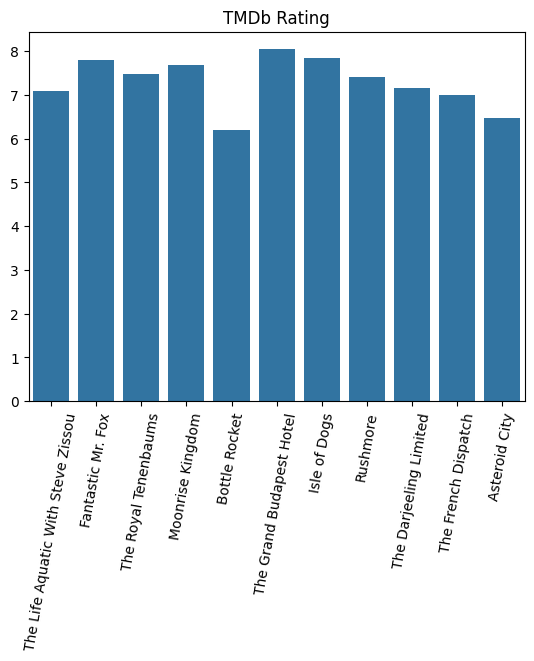

In [395]:
sns.barplot(x = wes_df['Film'], y = wes_df['TMDb_rating'], color = '#1f77b4')
plt.title('TMDb Rating')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.savefig('wes_tmdb_rating.png', bbox_inches='tight')
plt.show()

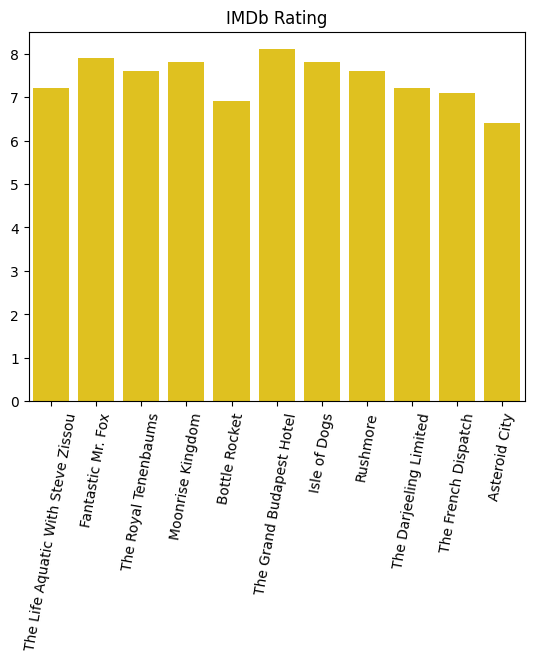

In [396]:
sns.barplot(x = wes_df['Film'], y = wes_df['IMDb_rating'], color = '#FFD700')
plt.title('IMDb Rating')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.savefig('wes_imdb_rating.png', bbox_inches='tight')
plt.show()

In [397]:
wes_df['RT_critic_score'] = wes_df['RT_critic_score'].str.replace('%','').astype(float)/10

In [398]:
wes_df['RT_audience_score'] = wes_df['RT_audience_score'].str.replace('%','').astype(float)/10

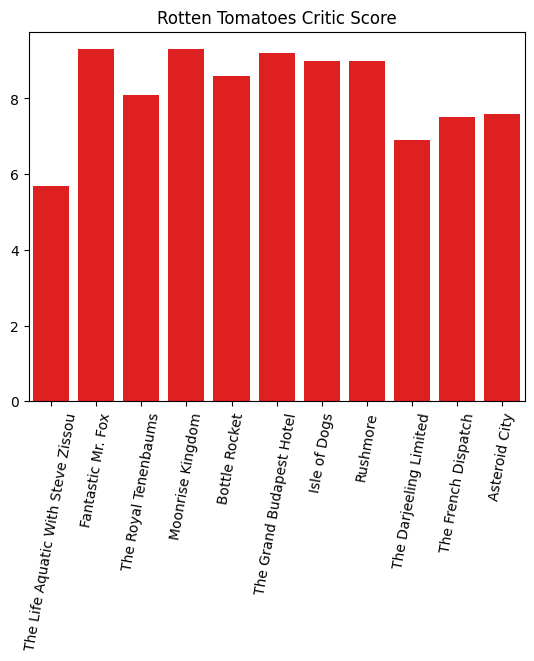

In [399]:
sns.barplot(x = wes_df['Film'], y = wes_df['RT_critic_score'], color = '#ff0000')
plt.title('Rotten Tomatoes Critic Score')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.savefig('wes_rt_critic.png', bbox_inches='tight')
plt.show()

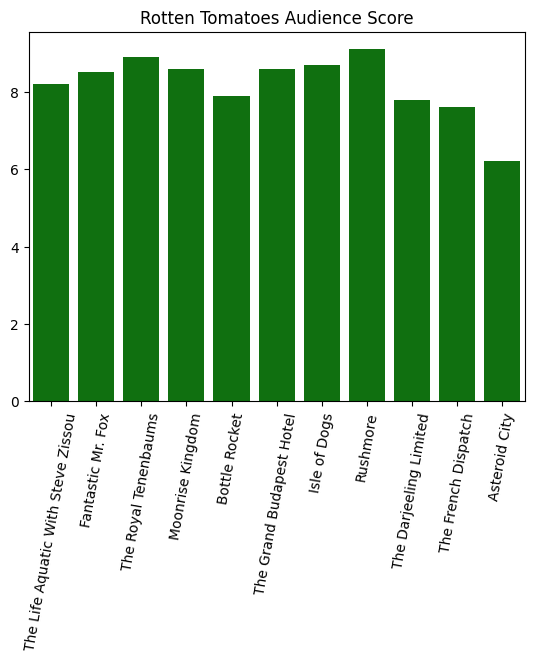

In [423]:
sns.barplot(x = wes_df['Film'], y = wes_df['RT_audience_score'], color = '#008000')
plt.title('Rotten Tomatoes Audience Score')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.savefig('wes_rt_audience.png', bbox_inches='tight')
plt.show()

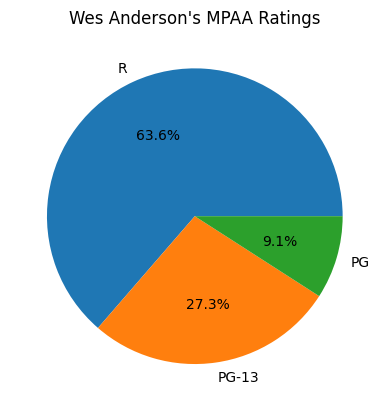

In [401]:
plt.pie(wes_df['MPAA_rating'].value_counts(), labels=['R','PG-13','PG'],autopct='%1.1f%%')
plt.title("Wes Anderson's MPAA Ratings")
plt.savefig('wes_mpaa.png')
plt.show()

In [402]:
wes_df['box_office'] = wes_df['box_office'].str.replace('$','')

In [403]:
def convert_to_float(value):
    if value.endswith('M'):
        return float(value[:-1]) * 1_000_000
    elif value.endswith('K'):
        return float(value[:-1]) * 1_000
    else:
        return float(value)

In [404]:
wes_df['box_office'] = wes_df['box_office'].apply(convert_to_float)

In [405]:
from matplotlib.ticker import FuncFormatter

In [406]:
def millions(x, pos):
    return f'${x/1_000_000:.0f}M'

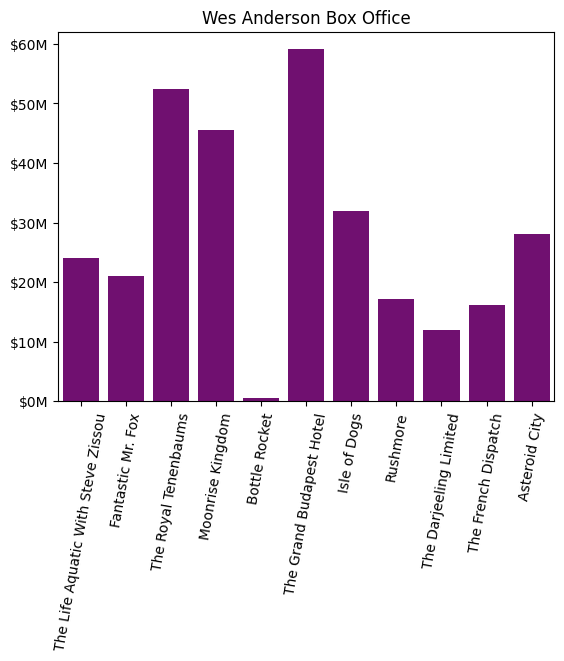

In [407]:
sns.barplot(x = wes_df['Film'], y = wes_df['box_office'], color = '#800080')
plt.title('Wes Anderson Box Office')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.savefig('wes_box_office.png', bbox_inches='tight')
plt.show()

In [411]:
pta_df['box_office'] = pta_df['box_office'].str.replace('$','')

In [408]:
pta_df['RT_critic_score'] = pta_df['RT_critic_score'].str.replace('%','').astype(float)/10

In [409]:
pta_df['RT_audience_score'] = pta_df['RT_audience_score'].str.replace('%','').astype(float)/10

In [413]:
pta_df['box_office'] = pta_df['box_office'].apply(convert_to_float)

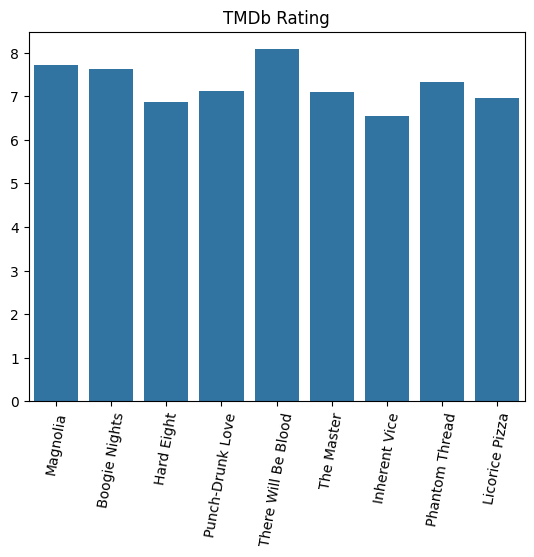

In [414]:
sns.barplot(x = pta_df['Film'], y = pta_df['TMDb_rating'], color = '#1f77b4')
plt.title('TMDb Rating')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.savefig('pta_tmdb_rating.png', bbox_inches='tight')
plt.show()

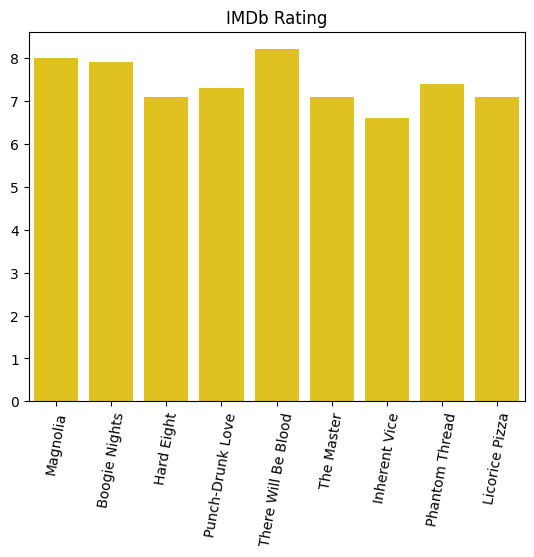

In [415]:
sns.barplot(x = pta_df['Film'], y = pta_df['IMDb_rating'], color = '#FFD700')
plt.title('IMDb Rating')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.savefig('pta_imdb_rating.png', bbox_inches='tight')
plt.show()

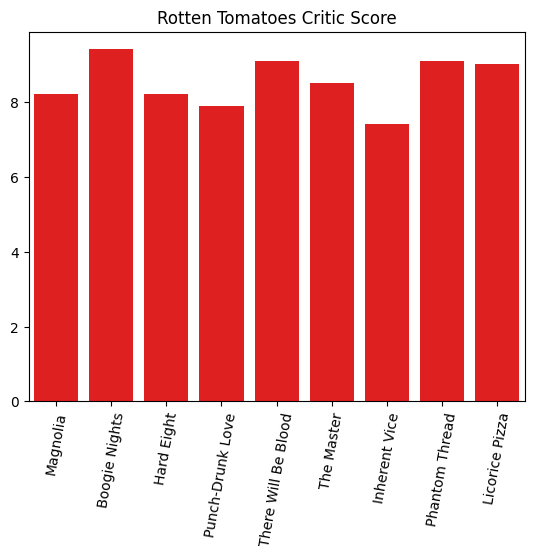

In [416]:
sns.barplot(x = pta_df['Film'], y = pta_df['RT_critic_score'], color = '#ff0000')
plt.title('Rotten Tomatoes Critic Score')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.savefig('pta_rt_critic.png', bbox_inches='tight')
plt.show()

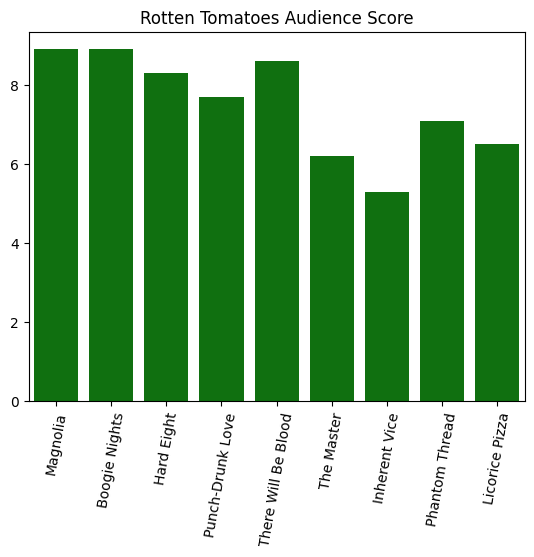

In [422]:
sns.barplot(x = pta_df['Film'], y = pta_df['RT_audience_score'], color = '#008000')
plt.title('Rotten Tomatoes Audience Score')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.savefig('pta_rt_audience.png', bbox_inches='tight')
plt.show()

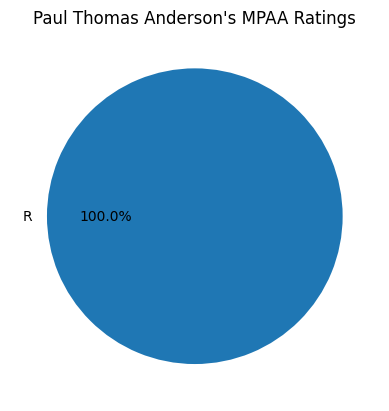

In [418]:
plt.pie(pta_df['MPAA_rating'].value_counts(), labels='R',autopct='%1.1f%%')
plt.title("Paul Thomas Anderson's MPAA Ratings")
plt.savefig('pta_mpaa.png')
plt.show()

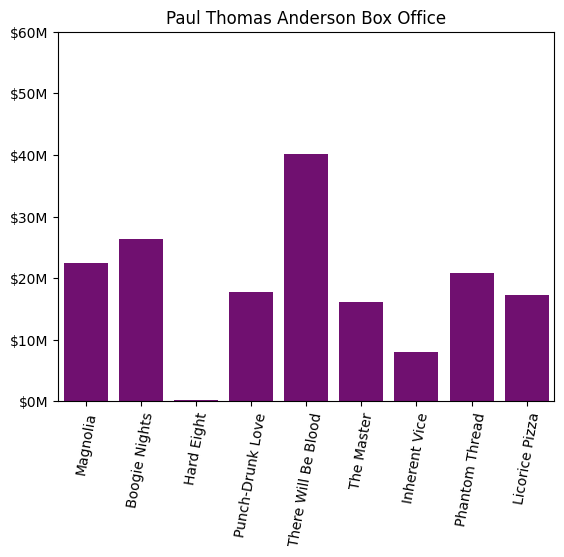

In [424]:
sns.barplot(x = pta_df['Film'], y = pta_df['box_office'], color = '#800080')
plt.title('Paul Thomas Anderson Box Office')
plt.xticks(rotation=80)
plt.xlabel('')
plt.ylabel('')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
plt.yticks(range(0, 60000001, 10000000))
plt.savefig('pta_box_office.png', bbox_inches='tight')
plt.show()